In [1]:
import requests
import pandas as pd
import time


In [ ]:
# 56c0fdee-10af-4562-8f2d-2452ae61b191 #

# Projet NBA – Analyse Exploratoire et Statistique des Joueurs et Équipes 🏀

## 🎯 Objectif du projet
Ce projet a pour but d’explorer les données de la NBA à travers les performances des joueurs et des équipes, en réalisant :
- Une analyse exploratoire complète (EDA)
- Des visualisations pour repérer les meilleurs joueurs/équipes
- Une étude statistique des saisons récentes
- Une préparation possible vers un modèle de prédiction

Les données sont extraites via la librairie `nba_api`, en se basant sur la saison régulière 2022-23.


In [6]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamefinder, playercareerstats, playergamelog
import pandas as pd

# Chargement des matchs saison 2022-23
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2022-23')
games_df = gamefinder.get_data_frames()[0]

# Nettoyage basique
games_df = games_df[games_df['SEASON_ID'] == '22022'].copy()
games_df.sort_values('GAME_DATE', inplace=True)
games_df.reset_index(drop=True, inplace=True)

games_df.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,0.857,4,27,31,16,8,3,14,25,-9.0
1,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
2,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
3,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,126,...,0.786,6,30,36,24,8,3,10,24,9.0
4,22022,1610612745,HOU,Houston Rockets,0022200005,2022-10-19,HOU @ ATL,L,240,107,...,0.933,15,39,54,25,4,3,15,20,-10.0


## 1. Chargement des données

Nous récupérons tous les matchs de la saison régulière NBA 2022-23 via l’API officielle `nba_api`.
Chaque ligne correspond à un match joué par une équipe, donc chaque match est doublé (une ligne par équipe).


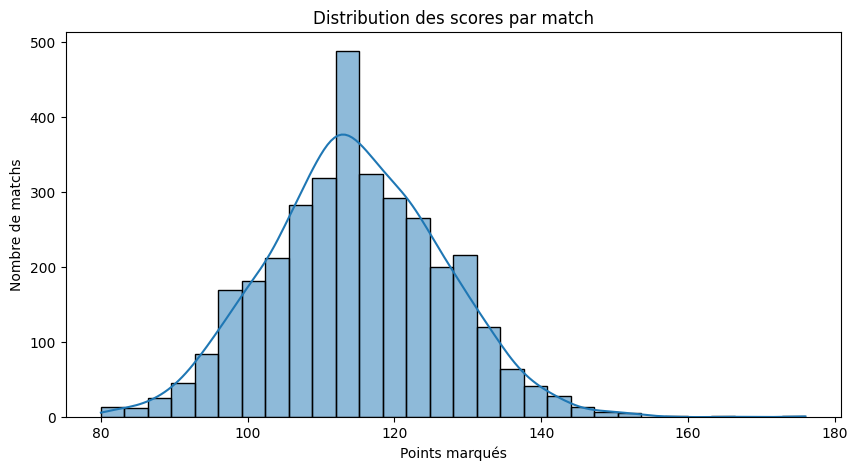

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(games_df['PTS'], bins=30, kde=True)
plt.title("Distribution des scores par match")
plt.xlabel("Points marqués")
plt.ylabel("Nombre de matchs")
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_35367/277734581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg.values, y=team_avg.index, palette="Blues_d")


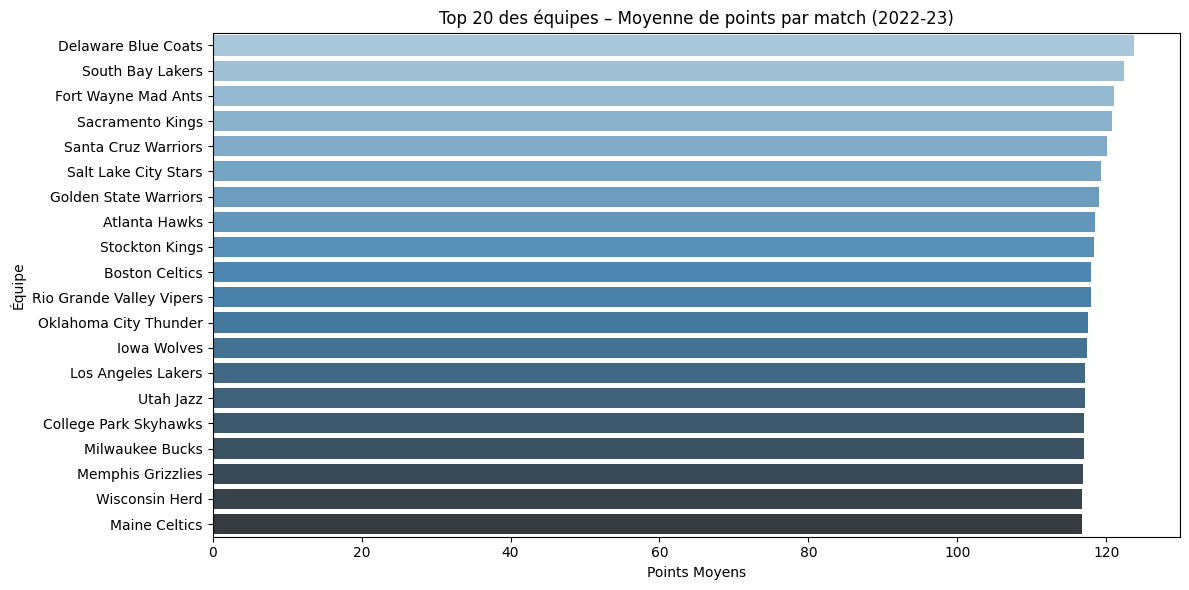

In [9]:
# Trier les équipes par points moyens
team_avg = games_df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=team_avg.values, y=team_avg.index, palette="Blues_d")
plt.title("Top 20 des équipes – Moyenne de points par match (2022-23)")
plt.xlabel("Points Moyens")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


## 2. Analyse Exploratoire – Scores et Performances

On observe une distribution centrée autour de 110 points par match. Certaines équipes, comme les Sacramento Kings ou Golden State Warriors, ont des scores moyens bien plus élevés.

Cela reflète leur style de jeu offensif rapide.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_35367/3310664045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Win Rate (%)', y=sorted_winrate.index, data=sorted_winrate, palette="coolwarm")


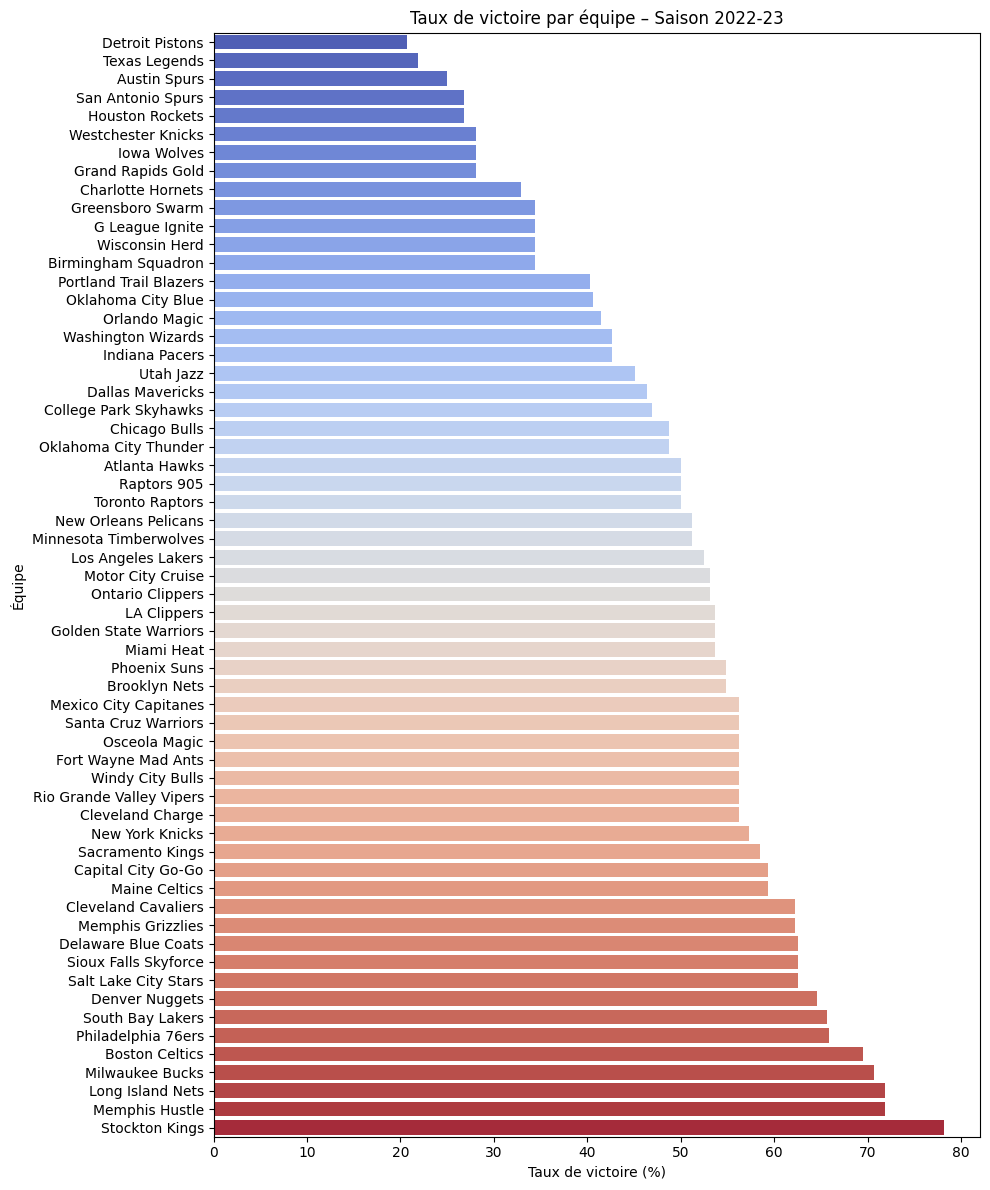

In [11]:
# On trie par taux de victoire
sorted_winrate = winrate.sort_values('Win Rate (%)', ascending=True)

# Affichage horizontal
plt.figure(figsize=(10, 12))
sns.barplot(x='Win Rate (%)', y=sorted_winrate.index, data=sorted_winrate, palette="coolwarm")
plt.title("Taux de victoire par équipe – Saison 2022-23")
plt.xlabel("Taux de victoire (%)")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


## 3. Performance des équipes

Le graphique ci-dessus classe les équipes selon leur pourcentage de victoire. On retrouve en haut du classement les équipes les plus compétitives de la saison régulière.

Cela permet déjà de dégager les favoris.


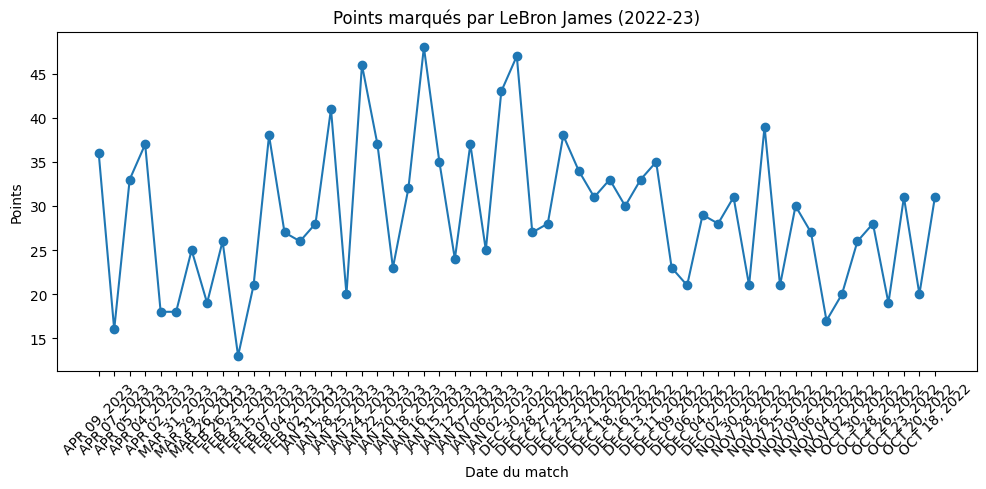

In [12]:
lebron_id = players.find_players_by_full_name("LeBron James")[0]['id']
lebron_gamelog = playergamelog.PlayerGameLog(player_id=lebron_id, season='2022-23')
lebron_df = lebron_gamelog.get_data_frames()[0]

# Points par match
plt.figure(figsize=(10,5))
plt.plot(lebron_df['GAME_DATE'], lebron_df['PTS'], marker='o')
plt.xticks(rotation=45)
plt.title("Points marqués par LeBron James (2022-23)")
plt.xlabel("Date du match")
plt.ylabel("Points")
plt.tight_layout()
plt.show()


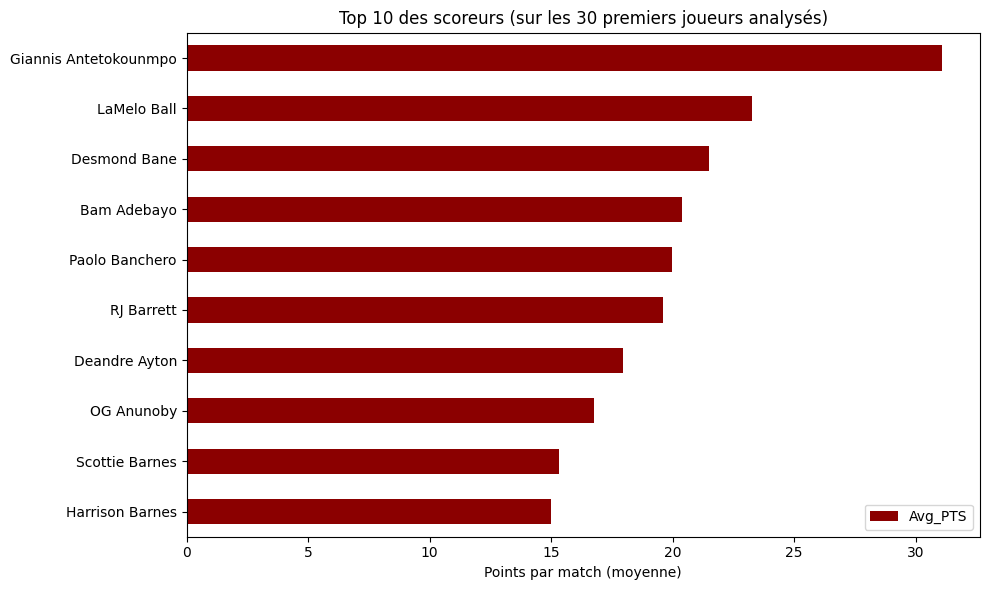

In [14]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Liste des joueurs actifs
player_list = players.get_active_players()

# On limite à 30 joueurs pour éviter les appels trop longs (on pourra élargir après)
top_players = player_list[:30]

# Dictionnaire pour stocker les moyennes
player_stats = {}

for player in top_players:
    try:
        gamelog = playergamelog.PlayerGameLog(player_id=player['id'], season='2022-23')
        df = gamelog.get_data_frames()[0]
        avg_pts = df['PTS'].mean()
        player_stats[player['full_name']] = avg_pts
    except Exception as e:
        print(f"Erreur pour {player['full_name']}: {e}")

# Création du DataFrame
top_df = pd.DataFrame.from_dict(player_stats, orient='index', columns=['Avg_PTS'])
top_df = top_df.sort_values('Avg_PTS', ascending=False).head(10)

# Affichage
top_df.plot(kind='barh', figsize=(10,6), color='darkred')
plt.xlabel("Points par match (moyenne)")
plt.title("Top 10 des scoreurs (sur les 30 premiers joueurs analysés)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Analyse individuelle – Top scoreurs NBA 2022-23

Nous extrayons les performances de plusieurs joueurs de NBA et calculons leur moyenne de points sur la saison 2022-23. Le graphique ci-dessous montre les 10 meilleurs scoreurs (parmi les 30 joueurs testés ici pour des raisons de temps).

On peut élargir facilement à tous les joueurs si besoin.
